<a href="https://colab.research.google.com/github/HARRSAVARTHINI/Mini-Project_Earthquake/blob/main/IBM_MINI_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing packages

In [ ]:
import requests
import csv
from csv import DictReader
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb


In [ ]:
!pip install matplotlib
!apt install libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
!pip install pyproj==1.9.6

from mpl_toolkits.basemap import Basemap as Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sb.set_style('whitegrid')

Importing dataset

In [ ]:
eq = pd.read_csv('/content/4.5_month.csv')
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-21T06:21:10.003Z,-6.8531,107.0946,10.000,5.6,mww,84.0,40.0,0.819,0.58,...,2022-11-21T08:25:11.797Z,"18 km WSW of Ciranjang-hilir, Indonesia",earthquake,5.78,1.830,0.063,24.0,reviewed,us,us
1,2022-11-21T04:25:38.072Z,29.2105,139.4019,416.432,5.2,mww,121.0,90.0,3.909,0.65,...,2022-11-21T04:44:29.040Z,"Izu Islands, Japan region",earthquake,10.04,6.529,0.098,10.0,reviewed,us,us
2,2022-11-21T03:22:21.358Z,41.5007,-29.3221,10.000,4.8,mb,80.0,62.0,4.746,0.48,...,2022-11-21T03:53:37.040Z,"273 km NE of Santa Cruz das Flores, Portugal",earthquake,6.89,1.835,0.038,214.0,reviewed,us,us
3,2022-11-21T01:41:04.665Z,-4.9700,100.7146,24.822,4.9,mb,71.0,71.0,2.314,0.76,...,2022-11-21T06:48:00.278Z,"215 km SW of Bengkulu, Indonesia",earthquake,6.84,4.408,0.085,44.0,reviewed,us,us
4,2022-11-20T23:36:44.616Z,18.6041,-106.4742,10.000,4.8,mb,77.0,129.0,5.068,1.14,...,2022-11-21T00:48:20.190Z,"180 km SW of José María Morelos, Mexico",earthquake,8.12,1.928,0.035,249.0,reviewed,us,us


In [ ]:
freq = eq['mag'].value_counts()
freq

4.50    112
4.60     94
4.90     57
4.70     54
5.00     43
4.80     33
5.10     32
5.20     21
5.30     10
5.40      8
5.50      7
5.60      6
5.80      4
6.10      4
5.70      3
7.00      2
6.90      1
6.20      1
7.30      1
6.60      1
6.80      1
6.00      1
5.90      1
4.58      1
5.06      1
6.40      1
6.30      1
4.66      1
Name: mag, dtype: int64

Line Plot

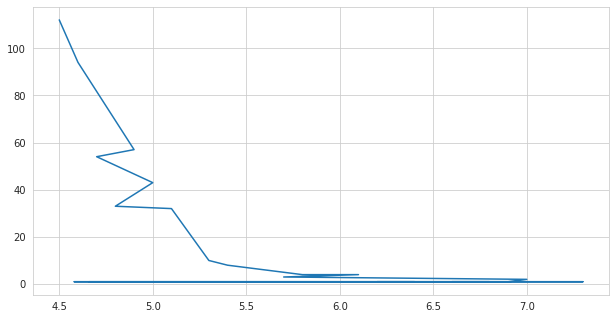

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.plot(freq)

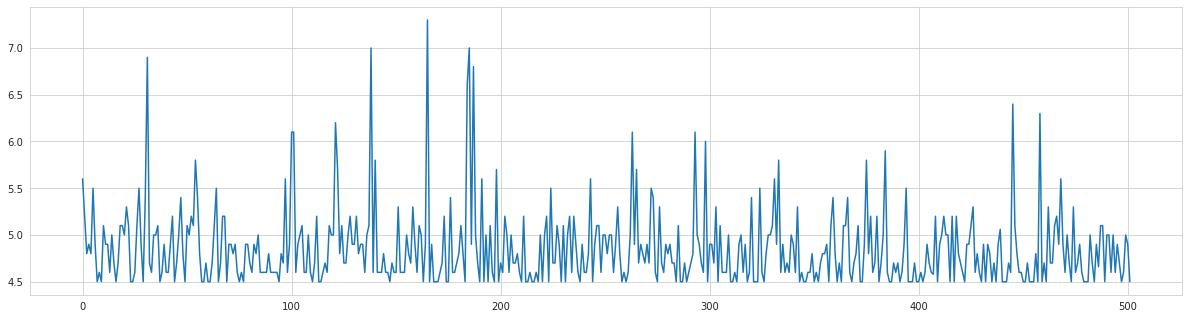

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2, 1])
ax.plot(eq['mag'])

In [ ]:
x = eq.iloc[:,1:5]
x

,latitude,longitude,depth,mag
0,-6.8531,107.0946,10.000,5.6
1,29.2105,139.4019,416.432,5.2
2,41.5007,-29.3221,10.000,4.8
3,-4.9700,100.7146,24.822,4.9
4,18.6041,-106.4742,10.000,4.8
...,...,...,...,...
497,-1.0415,133.8499,33.367,4.5
498,7.8294,-81.5745,10.000,4.6
499,46.4195,149.9048,10.855,5.0
500,53.4504,161.7344,10.000,4.9


In [ ]:
y = eq.iloc[:,4]
y

0      5.6
1      5.2
2      4.8
3      4.9
4      4.8
      ... 
497    4.5
498    4.6
499    5.0
500    4.9
501    4.5
Name: mag, Length: 502, dtype: float64

**Prediction**


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(376, 4)
(126, 4)
(376,)
(126,)


LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([4.6, 5.6, 4.9, 5. , 4.9, 4.7, 4.5, 4.5, 4.9, 4.6, 4.9, 5. , 4.6,
       5. , 4.6, 6. , 4.6, 4.5, 4.6, 4.5, 4.8, 5.2, 4.7, 5. , 4.7, 5.3,
       5.3, 5.2, 4.7, 4.9, 4.7, 5.1, 5.1, 4.6, 5. , 4.5, 4.5, 4.5, 4.8,
       5.6, 4.6, 5. , 4.7, 5.5, 4.6, 5.2, 4.5, 4.5, 4.5, 4.6, 5.1, 4.5,
       4.5, 4.8, 4.8, 4.9, 5. , 5.2, 5.1, 4.7, 4.9, 4.6, 4.5, 4.6, 5.3,
       4.9, 5.1, 4.6, 4.5, 4.5, 4.6, 4.5, 5.3, 5.1, 4.5, 5.1, 4.8, 6.1,
       5. , 4.5, 4.7, 4.5, 5. , 4.6, 4.5, 5.1, 4.5, 4.7, 5. , 5.8, 4.7,
       5. , 4.6, 4.8, 4.7, 4.5, 4.8, 4.5, 4.5, 4.6, 4.6, 4.6, 4.9, 4.7,
       4.9, 5. , 4.5, 4.6, 4.9, 5. , 4.5, 4.5, 5.1, 4.6, 4.7, 4.8, 4.9,
       4.6, 4.5, 4.9, 4.6, 4.5, 4.9, 4.7, 4.5, 5. ])

In [ ]:
y_test.values

array([4.6, 5.6, 4.9, 5. , 4.9, 4.7, 4.5, 4.5, 4.9, 4.6, 4.9, 5. , 4.6,
       5. , 4.6, 6. , 4.6, 4.5, 4.6, 4.5, 4.8, 5.2, 4.7, 5. , 4.7, 5.3,
       5.3, 5.2, 4.7, 4.9, 4.7, 5.1, 5.1, 4.6, 5. , 4.5, 4.5, 4.5, 4.8,
       5.6, 4.6, 5. , 4.7, 5.5, 4.6, 5.2, 4.5, 4.5, 4.5, 4.6, 5.1, 4.5,
       4.5, 4.8, 4.8, 4.9, 5. , 5.2, 5.1, 4.7, 4.9, 4.6, 4.5, 4.6, 5.3,
       4.9, 5.1, 4.6, 4.5, 4.5, 4.6, 4.5, 5.3, 5.1, 4.5, 5.1, 4.8, 6.1,
       5. , 4.5, 4.7, 4.5, 5. , 4.6, 4.5, 5.1, 4.5, 4.7, 5. , 5.8, 4.7,
       5. , 4.6, 4.8, 4.7, 4.5, 4.8, 4.5, 4.5, 4.6, 4.6, 4.6, 4.9, 4.7,
       4.9, 5. , 4.5, 4.6, 4.9, 5. , 4.5, 4.5, 5.1, 4.6, 4.7, 4.8, 4.9,
       4.6, 4.5, 4.9, 4.6, 4.5, 4.9, 4.7, 4.5, 5. ])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


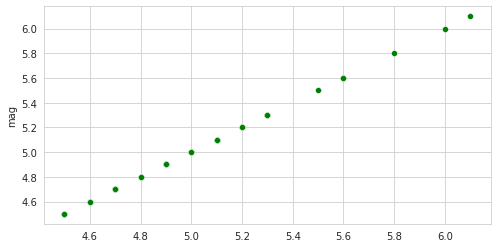

In [ ]:
sns.scatterplot(y_pred,y_test,color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


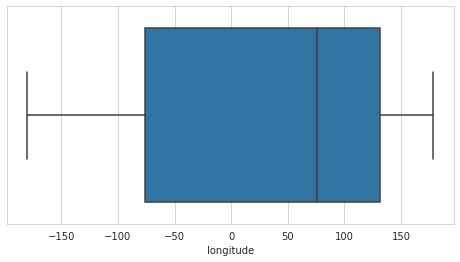

In [ ]:
sns.boxplot(x_test["longitude"])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test,'Predicted' : y_pred})
df1

,Actual,Predicted
90,4.6,4.6
97,5.6,5.6
332,4.9,4.9
339,5.0,5.0
340,4.9,4.9
...,...,...
49,4.5,4.5
134,4.9,4.9
225,4.7,4.7
400,4.5,4.5


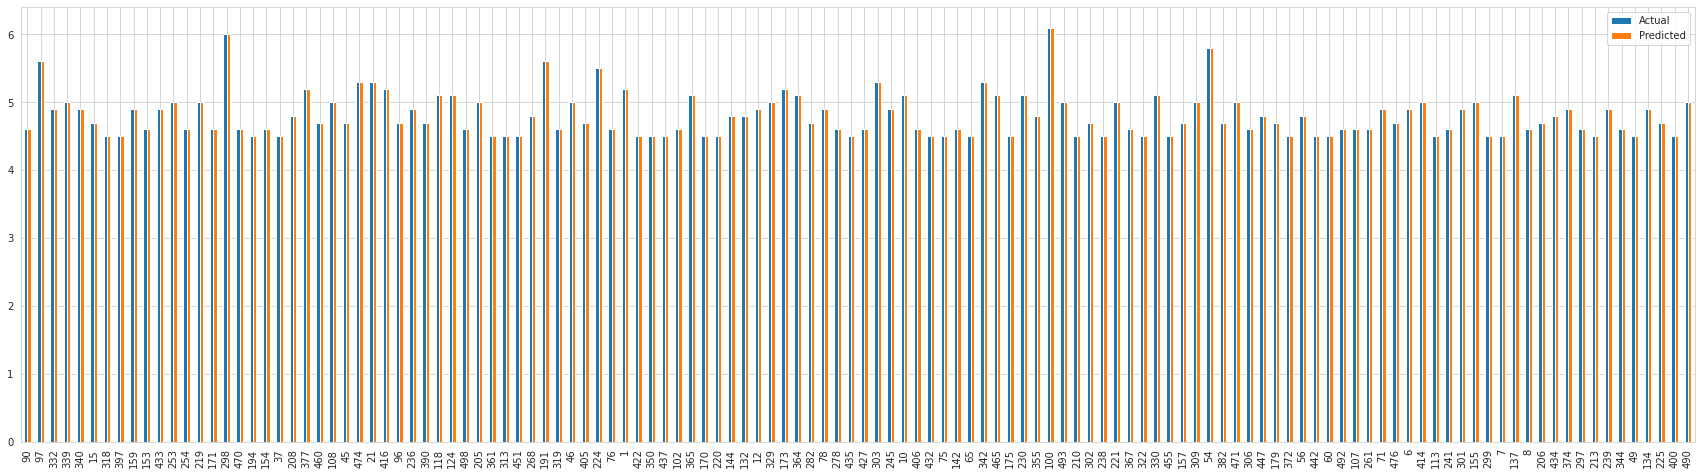

In [ ]:
df1.plot(figsize = (30,8),kind = 'bar')

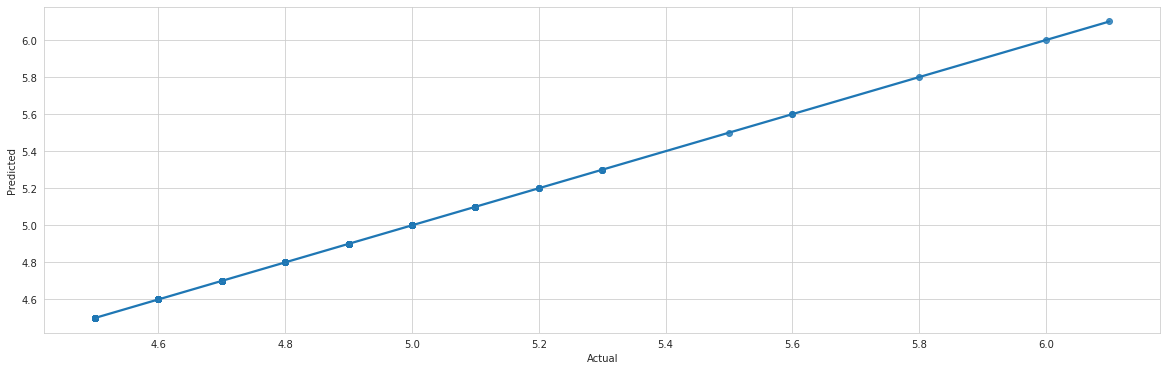

In [ ]:
plt.figure(figsize=(20,6))

sns.regplot(x='Actual',y='Predicted',data=df1)

Global View: 


*   Yellow color for earthquakes below 4.5 and above 3.0
*   Green color for earthquakes below 3.0    
*   Red color for significant earthquakes




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


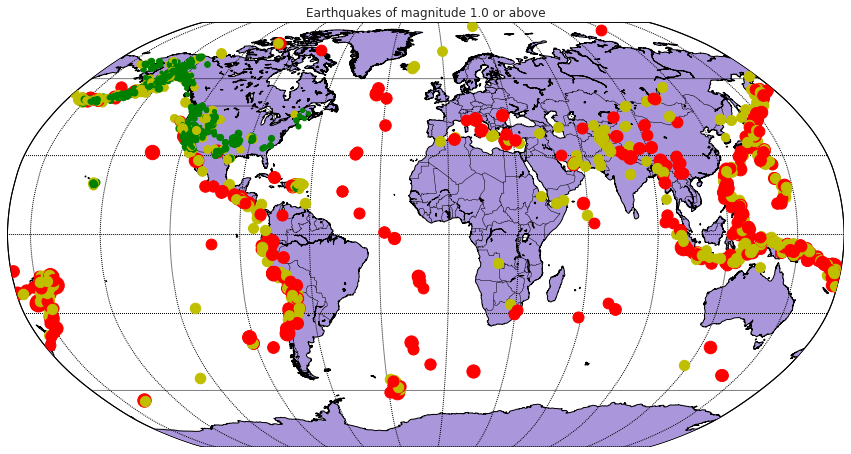

In [ ]:
eq_lat, eq_lon = [], []
magnitudes = []
eq_ts = []
with open('/content/1.0_month.csv') as f:
    reader = csv.reader(f)
    next(reader)
    
    # here we store latitude and longitude in seperate lists
    for row in reader:
        eq_lat.append(float(row[1]))
        eq_lon.append(float(row[2]))
        magnitudes.append(float(row[4]))
        eq_ts.append(row[0])
def mk_color(magnitude):
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 4.5:
        return ('yo')
    else:
        return ('ro')
plt.figure(figsize=(15,11))
my_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=-10)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = '#aa96da')
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
mk_size = 2.4
for lon, lat, mag in zip(eq_lon, eq_lat, magnitudes):
    x,y = my_map(lon, lat)
    msize = mag * mk_size
    marker_string = mk_color(mag)
    my_map.plot(x, y, marker_string, markersize=msize)   
plt.title('Earthquakes of magnitude 1.0 or above')
# we can save the image as png file locally to the directory we are working in
plt.savefig('eq_data.png')
plt.show()